**Import required packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like  # can remove this when v0.7 of pdr is available
import pandas_datareader.data as web
import datetime as dt
# Stock prices method based on https://pythonprogramming.net/getting-stock-prices-python-programming-for-finance/


%load_ext autoreload
%autoreload 2

**Specific current holdings and target allocation**
+ Specify the current holdings of each equity in the `num_shares` list
+ The example portfolios here are provided as-is for education purposes. They do not constitute a recommended or endorsed investment stragegy

In [71]:

## a portfolio based on the pre-2018 Betterment strategy (international heavy)
symbs = ["SCHB", "VTI", "VTV", "VOE", "VBR", "VEA", "SCHF", "VWO", "IEMG", "VXUS"]
num_shares = np.array([45, 31, 42, 5, 20, 31, 32, 41, 21, 32])
target_alloc = [0.087, 0.087, 0.178, 0.05, 0.05, 0.205, 0.205, .0655, .0655, 0]


## a portfolio based on the Betterment 2018 all-stock allocation
symbs = ['SCHB','VTI','VXUS','VOE','VBR','VEA','VWO','VXUS']
num_shares = np.array([26,13,27,43,23,3,31,9])
target_alloc = [0.1765, 0.1765, 0.094, 0.077, 0.065, 0.1295, 0.076, 0.205]


## an all-stock "lazy" Bogleheads portfolio
symbs = ['VTI','SCHB','VXUS']
num_shares = np.array([13,26,27])
target_alloc = [.35, .35, .3]



df = web.DataReader(symbs, 'morningstar', dt.datetime(2015, 1, 1), dt.datetime.now())
curr_prices = np.array([df.loc[symb]['Close'][-1] for symb in symbs])
curr_value = num_shares.dot(curr_prices)
curr_alloc = (num_shares*curr_prices)/curr_value

In [72]:
sim_shares = np.copy(num_shares)
sim_alloc = np.copy(curr_alloc)
num_buys = 1000
cost = 0

buy_series = list()
cost_series = [0]
drift_series = list()

for ii in range(num_buys):
    drift = sim_alloc - target_alloc
    net_drift = np.sum(np.abs(drift))
    rel_drift = (drift*curr_prices)/curr_prices
    ordering = np.argsort(rel_drift)
    buy_index = ordering[0]
    
    
    cost += curr_prices[buy_index]
    
    sim_shares[buy_index] += 1
    sim_alloc = (sim_shares*curr_prices)/(sim_shares.dot(curr_prices))
    
    buy_series.append(buy_index)
    cost_series.append(cost)
    drift_series.append(net_drift)
cost_series = np.array(cost_series)
buy_series = np.array(buy_series)

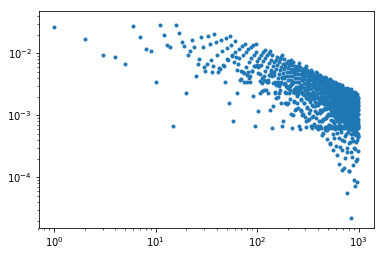

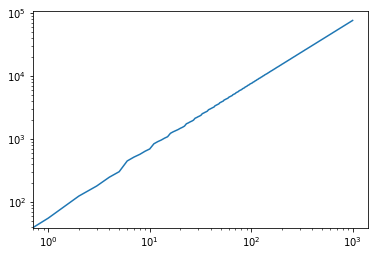

In [74]:
plt.figure()
plt.loglog(drift_series,'.')

plt.figure()
plt.loglog(cost_series)

In [76]:
sum_to_invest = 15000

stop_ind = len(cost_series[cost_series<sum_to_invest])-1
buy_series_truncated = buy_series[:stop_ind]
inds, cts = np.unique(buy_series_truncated, return_counts=True)

print("Investing strategy:")
for ind, ct in zip(inds,cts):
    print(str(symbs[ind]), ': ', str(ct))

print('\nResidual balance: ', str(sum_to_invest - cost_series[stop_ind]))

print('\nResidual drift: ', str(100*drift_series[stop_ind]),'%')

Investing strategy:
VTI :  35
SCHB :  77
VXUS :  82

Residual balance:  141.329999999969

Residual drift:  0.2938505724436491 %
